<a href="https://colab.research.google.com/github/liortiz/ML-2021/blob/main/ML_2021_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h3><center>Introducción al Aprendizaje de Máquina</center>
<center>2021-I</center>
<center>Lizeth Catherine Ortiz Pulido</center>
<center>liortiz@unal.edu.co</center></h3>

# Ejercicio 1
Learning from data, Exercice 1.2

Supongamos que usamos un perceptron para detectar mensajes de spam.  Digamos que cada mensaje de correo electrónico está representado por la frecuencia de aparición de palabras clave, y el resultado es +1 si el mensaje se considera spam.

a) ¿Puede pensar en algunas palabras clave que terminarán con un gran peso positivo en el perceptrón?

Obsequio, Lotería, Regalo,Juegos Gratis, Bono de Bienvenida, Cupón de oferta, Gratis, Fortuna, Dinero fácil/extra, Felicidades, Urgente, Desesperado, Ayuda por favor, Sexo, Conoce solteros, Elimina arrugas, Pierde peso...


(b) ¿Qué hay de las palabras clave que obtendrán un peso negativo? 

Buenos días/tardes, Nombre del receptor, Universidad, Profesor, Jefe, Trabajo...


(c) ¿Qué parámetro del perceptrón afecta directamente a cuántos mensajes límite terminan siendo clasificados como spam?

Teniendo en cuenta que el perceptrón se puede ver como:
$$h(x)=sign\Bigg(\Bigg(\sum^d_{i=1}\Bigg)+b\Bigg)$$
Entonces el párametro que afecta directamente a cuántos mensajes límite terminan siendo clasificados como spam es $b$.

# Ejercicio 2
Learning from data, Exercice 1.3

La regla de actualización de peso $w(t+1)=w(t)+y(t)x(t)$ tiene la buena interpretación de que se mueve en la dirección de clasificar $x(t)$ correctamente.

(a) Muestre que $y(t)w^T(t)x(t)< 0$   [Sugerencia: $x(t)$ está mal clasificado por $w(t)$.] 

Como $x(t)$ está mal clasificado por $w(t)$ entonces $\operatorname{sign} (w^T(t)x(t))\ne \operatorname{sign}y(t)$ así, $y(t)w^T(t)x(t)< 0$.

(b) Muestre que $y(t)w^T(t+1)x(t)>y(t)w^T(t)x(t)$ [Sugerencia: Utilice $w(t+1)=w(t)+y(t)x(t)$.] 

$$
\left.
    \begin{array}\\
        y(t)w^T(t)x(t) &< y(t)w^T(t)x(t) + y(t)(y(t)x(t))^Tx(t)\\
        &=(y(t)w(t)^T+y(t)(y(t)x(t))^T)x(t)\\
        &=y(t)(w(t)+y(t)x(t))^Tx(t)\\
        &=y(t)w^T(t+1)x(t)
    \end{array}
\right.
$$


(c) En lo que respecta a la clasificación de $x(t)$, argumente que el movimiento de  $w(t)$ a $w(t+1)$ es un movimiento "en la dirección correcta".

Teniendo en cuenta que $y(t)w^T(t)x(t)$ es creciente tenemos dos casos: 

1.   Si $y(t)$ es positivo entonces $w^T(t)x(t)$ es negativo, así al aumentar $y(t)w^T(t)x(t)$, $w^T(t)x(t)$ se mueve positivamente.
2.   Si $y(t)$ es negativo entonces $w^T(t)x(t)$ es positivo, así al aumentar $y(t)w^T(t)x(t)$, $w^T(t)x(t)$ se mueve negativamente.

Así que el paso de $w(t)$ a $w(t+1)$ es un movimiento "en la dirección correcta" respecto a la clasificación de $x(t)$.

# Ejercicio 3
Learning from data, Exercice 1.10

A continuación, se muestra un experimento que ilustra la diferencia entre un solo contenedor y varios contenedores.  Ejecute una simulación por computadora para lanzar 1,000 monedas justas.  Lanza cada moneda de forma independiente 10 veces.  Centrémonos en 3 monedas de la siguiente manera: $c_1$ es la primera moneda lanzada;  $c_{rand}$ es una moneda que eliges al azar;  $c_{min}$ es la moneda que tuvo la menor frecuencia de caras (elija la primera en aparecer en caso de empate).  Sea $v_1$, $v_{rand}$ y $v_{min}$ la fracción de caras que obtenga por las tres monedas respectivas.

(a) ¿Cuál es $\mu$ para las tres monedas seleccionadas?  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def flipCoinsFreq(nCoins,nTrials):
  numHeads = np.zeros(nCoins)
  for i in range(nTrials):
    # va sumando si obtiene cara o no en cada tirada
    numHeads += np.random.binomial(1,0.5,nCoins)

  # se calcula la frecuencia de caras de cada moneda
  headFreq = numHeads/nTrials

  # se escogen las frecuencias de las monedas "especiales"
  v_1 = headFreq[0]
  v_min = np.min(headFreq)
  v_rand = np.random.choice(headFreq)

  # se calcula el mu
  mu = (v_1+v_min+v_rand)/3  

  return v_1, v_min, v_rand, mu

v_1,v_min,v_rand,mu = flipCoinsFreq(1000,10)
print("La frecuencia de la primera moneda es: ",v_1)
print("La frecuencia menor es: ",v_min)
print("La frecuencia de una moneda aleatoria es: ",v_rand)
print("El promedio de estas tres frecuencias es (mu): ",mu)

La frecuencia de la primera moneda es:  0.9
La frecuencia menor es:  0.0
La frecuencia de una moneda aleatoria es:  0.6
El promedio de estas tres frecuencias es (mu):  0.5


(b) Repita todo este experimento un gran número de veces (por ejemplo, 100, 000 ejecuciones de todo el experimento) para obtener varias instancias de $v_1$, $v_{rand}$ y $v_{min}$ y trazar los histogramas de las distribuciones de $v_1$, $v_{rand}$ y $v_{min}$. Tenga en cuenta que las monedas que terminan en $c_{rand}$ y $c_{min}$, pueden diferir de una ejecución a otra

Text(0.5, 0, 'v_mins')

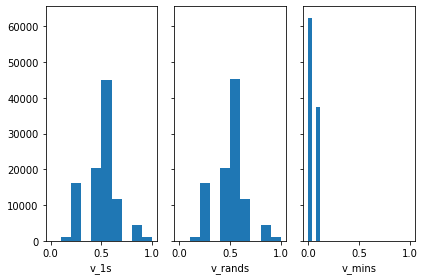

In [2]:
v_1s = []
v_mins = []
v_rands = []

for i in range(100000):
  # se calculan las frecuencias para luego guardarlas
  v_1Aux,v_minAux,v_randAux,mu = flipCoinsFreq(1000,10)  
  v_1s.append(v_1Aux)
  v_mins.append(v_minAux)
  v_rands.append(v_randAux)

fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True,sharex=True)
axs[0].hist(v_1s, bins=10)
axs[0].set_xlabel('v_1s')
axs[1].hist(v_rands,bins=10)
axs[1].set_xlabel('v_rands')
axs[2].hist(v_mins, bins=5)
axs[2].set_xlabel('v_mins')

(c) Utilizando (b), grafique estimaciones para $\mathbb{P}[|\nu-\mu|>\epsilon]$ como una función de $\epsilon$, junto con el límite de Hoeffding $2e^{-2\epsilon^2N}$ (en el mismo gráfico). 

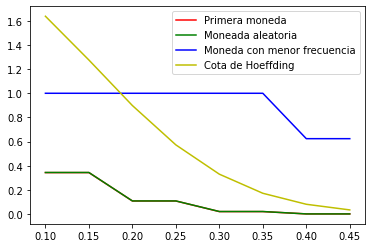

In [3]:
def limHoeffding(e,n):
  return 2*np.exp(-2*n*e**2)
  
e = np.arange(0.1,0.5,0.05)
g_1 = np.zeros(len(e))
g_rand = np.zeros(len(e))
g_min = np.zeros(len(e))
hoeffding = limHoeffding(e,10)

# se calculan las estimaciones
for i in range(len(e)):
  g_1[i]=np.sum(np.abs(np.array(v_1s)-0.5)>e[i])/100000
  g_rand[i]=np.sum(np.abs(np.array(v_rands)-0.5)>e[i])/100000
  g_min[i]=np.sum(np.abs(np.array(v_mins)-0.5)>e[i])/100000

plt.plot(e, g_1,  color='r',label='Primera moneda')
plt.plot(e, g_rand, color='g',label='Moneada aleatoria')
plt.plot(e, g_min,  color='b',label='Moneda con menor frecuencia')
plt.plot(e, hoeffding, color='y', label='Cota de Hoeffding')
plt.legend()

(d) Qué monedas obedecen al límite de Hoeffding y cuáles no. Explique por qué. 

Las monedas $c_1$ y $c_{rand}$ van a obedecer el límite de Hoeffding, porque son escogidas antes de generar los datos, a diferencia  $c_{min}$ la cual es escogida después de evaluar todos los datos dependiendo de ellos.

(e) Relacione la parte (d) con los múltiples contenedores de la figura 1.10.

Tomar $h_i$ con menos errores dentro de la muestra, es como tomar $c_{min}$, pero esto no es garantía de que vaya a actuar igual en todos los casos.

# Ejercicio 4
Learning from data, Exercice 1.11

Se nos proporciona un conjunto de datos $D$ de 25 ejemplos de entrenamiento de una función objetivo desconocida $f: X \rightarrow Y,$ donde $X = \mathbb{R}$ y $Y =\{-1, +1\}$.  Para aprender $f$, usamos un conjunto de hipótesis simple $H = \{h_1, ​​h_2\}$ donde $h_1$ es la función constante +1 y $h_2$ es la constante -1.  

Consideramos dos algoritmos de aprendizaje, $S$ (inteligente) y $C$ (loco).  $S$ elige la hipótesis que más concuerda con $D$ y $C$ elige la otra hipótesis deliberadamente.  Veamos cómo funcionan estos algoritmos fuera de la muestra desde los puntos de vista determinista y probabilístico.  Suponga en el punto de vista probabilístico que hay una distribución de probabilidad en $X$ y sea $\mathbb{P}[f (x) = +1] = p$.

(a) ¿Puede $S$ producir una hipótesis que esté garantizada para funcionar mejor que la aleatoria en cualquier punto fuera de $D$?  

No se puede estar seguro porque los puntos de afuera de $D$ pueden estar actuando muy diferente a los escogidos en la muestra.

(b) Suponga para el resto del ejercicio que todos los ejemplos en $D$ tienen $y_n =+ 1$.  ¿Es posible que la hipótesis que produce $C$ resulte ser mejor que la hipótesis que produce $S$? 

Si, $C$ tienes una probabilidad de $1/2$ en acertar en los puntos fuera de $D$.

 (c) Si $p = 0.9$, ¿cuál es la probabilidad de que $S$ produzca una hipótesis mejor que $C$?  

$S$ acertaría en un $90\%$ y $C$ un $10\%$.

(d) ¿Existe algún valor de $p$ para el que sea más probable que $C$ produzca una hipótesis mejor que $S$?

Si $p<0.5$ entonces $C$ tendría una probabilidad moyor o igual a $50\%$.

# Ejercicio 5
- Relación de $\frac{R^2\|\theta^*\|^2}{\gamma^2}$

Teniendo en cuenta que $R$ es el radio de la bola que acota nuestros datos, $\theta^*$ es el parámetro ideal de clasificación, $\gamma$ es el margen que nos garantiza la existencia de un clasificador linear y que 
$$
\left.
    \begin{array}\\
        \frac{k\gamma}{\sqrt{kR^2}\|\theta^*\|}&\leq cos(\theta^*,\theta^{(k)})\\
        \frac{k\gamma}{\sqrt{kR^2}\|\theta^*\|}&\leq 1\\
        \frac{k^2\gamma^2}{kR^2\|\theta^*\|^2}&\leq 1\\
        k&\leq\frac{R^2\|\theta^*\|^2}{\gamma^2}
    \end{array}
\right.
$$

Entonces podemos decir que $\frac{R^2\|\theta^*\|^2}{\gamma^2}$ es una cota para la complejidad del algoritmo: Entre más grande sea $R$, nuestros datos van a estar en un espacio grande lo que complica analizarlos y si $\gamma$ es grande facilita clasificar los datos.

# Ejercicio 6
Simular XOR

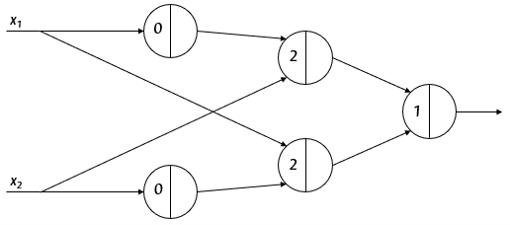